Objective of the Model

The goal is to segment customers based on their characteristics (such as Age, Annual Income, and Spending Score) using K-Nearest Neighbors. By doing this, we aim to:

Identify distinct customer groups — e.g., high-income but low-spending, young and high-spending, etc.

Enable targeted marketing strategies by understanding which group each customer belongs to.

Predict the segment of a new customer based on their features using KNN classification.

Visualize customer clusters to gain insights into spending patterns and demographics.

`1:Predict Customer Segment (Classification)
`
Target (y): Customer segment (you may define it yourself based on Spending Score and/or Income).

Features (X): Age, Gender, Annual Income (k$).

Goal: Classify a new customer into a segment like “High-Spending Young Adult” or “Low-Spending Older Adult.”

`2: Predict Spending Score (Regression)
`
Target (y): Spending Score (1–100)

Features (X): Age, Gender, Annual Income (k$)

Goal: Estimate how likely a customer is to spend a lot based on their demographics.


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
#load datset
data  = pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [150]:
data.describe()
data["Spending Score (1-100)"]

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

Lets do this first `1:Predict Customer Segment (Classification)
`
Target (y): Customer segment (you may define it yourself based on Spending Score and/or Income).

Features (X): Age, Gender, Annual Income (k$).

Goal: Classify a new customer into a segment like “High-Spending Young Adult” or “Low-Spending Older Adult.”

In [ ]:
#lets divide our spending into different segments using discritization.

def segment_customer(row):
    if row["Age"] < 25:
        return "High-Spend Teen" if row["Spending Score (1-100)"] > 50 else "Low-Spend Teen"
    elif row["Age"] < 60:
        return "High-Spend Adult" if row["Spending Score (1-100)"] > 50 else "Low-Spend Adult"
    else:
        return "High-Spend Senior" if row["Spending Score (1-100)"] > 50 else "Low-Spend Senior"
    

data["Segment"] = data.apply(segment_customer, axis=1)




In [152]:
#Now we divide the people spendings on the base of their age and spending score
data["Segment"]


0        Low-Spend Teen
1       High-Spend Teen
2        Low-Spend Teen
3       High-Spend Teen
4       Low-Spend Adult
             ...       
195    High-Spend Adult
196     Low-Spend Adult
197    High-Spend Adult
198     Low-Spend Adult
199    High-Spend Adult
Name: Segment, Length: 200, dtype: object

In [153]:
#lets encode the Gender
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    int64 
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Segment                 200 non-null    object
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [155]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()



In [156]:
X = data.drop(columns=["Spending Score (1-100)", "Segment"], axis=1)
y = data["Segment"]

In [157]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [159]:
y_pred = model.predict(test_X)
y_pred

array(['Low-Spend Teen', 'High-Spend Teen', 'Low-Spend Adult',
       'High-Spend Adult', 'Low-Spend Adult', 'Low-Spend Teen',
       'High-Spend Adult', 'Low-Spend Adult', 'Low-Spend Adult',
       'High-Spend Teen', 'Low-Spend Adult', 'Low-Spend Adult',
       'High-Spend Adult', 'High-Spend Adult', 'Low-Spend Adult',
       'High-Spend Adult', 'High-Spend Adult', 'Low-Spend Adult',
       'High-Spend Senior', 'High-Spend Adult', 'Low-Spend Teen',
       'High-Spend Adult', 'High-Spend Adult', 'Low-Spend Adult',
       'High-Spend Adult', 'High-Spend Senior', 'Low-Spend Adult',
       'High-Spend Senior', 'High-Spend Adult', 'High-Spend Adult',
       'High-Spend Teen', 'Low-Spend Adult', 'High-Spend Adult',
       'High-Spend Adult', 'Low-Spend Adult', 'Low-Spend Adult',
       'High-Spend Adult', 'High-Spend Adult', 'Low-Spend Adult',
       'Low-Spend Adult'], dtype=object)

In [160]:
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("\nClassification Report:\n", classification_report(test_y, y_pred))


Confusion Matrix:
 [[ 6  0  1  2  0  0]
 [ 0  1  0  0  0  0]
 [ 3  0  2  1  0  1]
 [ 7  0  0 11  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  0  2]]

Classification Report:
                    precision    recall  f1-score   support

 High-Spend Adult       0.38      0.67      0.48         9
High-Spend Senior       0.33      1.00      0.50         1
  High-Spend Teen       0.67      0.29      0.40         7
  Low-Spend Adult       0.73      0.61      0.67        18
 Low-Spend Senior       0.00      0.00      0.00         3
   Low-Spend Teen       0.67      1.00      0.80         2

         accuracy                           0.55        40
        macro avg       0.46      0.59      0.47        40
     weighted avg       0.57      0.55      0.53        40



/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

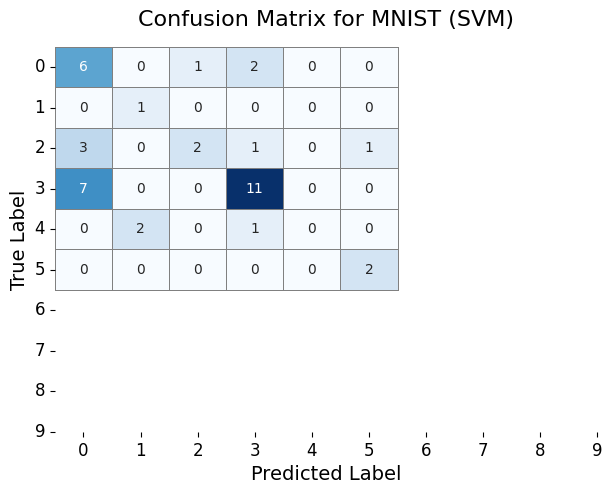

In [161]:
cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10),
            linewidths=0.5, linecolor='gray')

plt.title("Confusion Matrix for MNIST (SVM)", fontsize=16, pad=15)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()